In [2]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="muted", color_codes=True)

warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

### DATA SOURCE: https://www.ktb.gov.tr/EN-249300/monthly-bulletins.html

In [3]:
ctzn_df=pd.read_csv("datasets/tr_tourist_citizen_monthlytravel/citizen_travel_df.csv")
tour_df=pd.read_csv("datasets/tr_tourist_citizen_monthlytravel/tourist_monthly_arrivals.csv")

# Citizen Travel Data

In [13]:
ctzn_df['month'] = (
    ctzn_df['month']
    .replace(["jaunary", "january", 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'],
             [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

In [17]:
ctzn_df["month_year"] = ctzn_df["month"].astype("string") + "-" + ctzn_df["year"].astype("string")

In [29]:
ctzn_df['BORDER GATES'] = ctzn_df['BORDER GATES'].replace('New Istanbul Airport', 'New Istanbul Airport (Air)')

### Note: Returning means citizens Travelling **to** Istanbul. Travelling Abroad means citizens travelling **from** Istanbul to outside of the country.

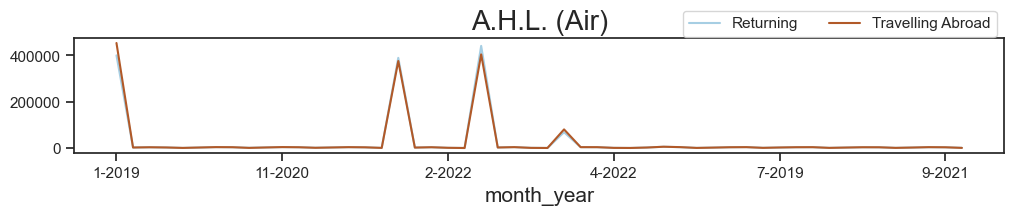

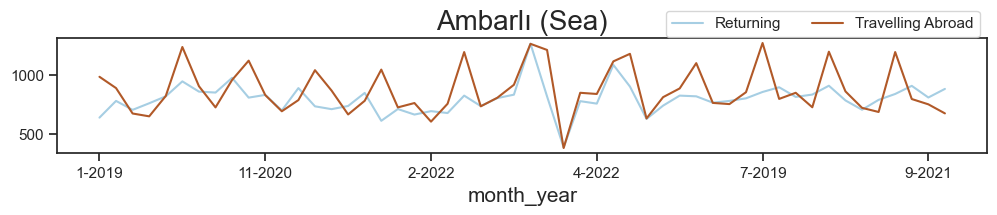

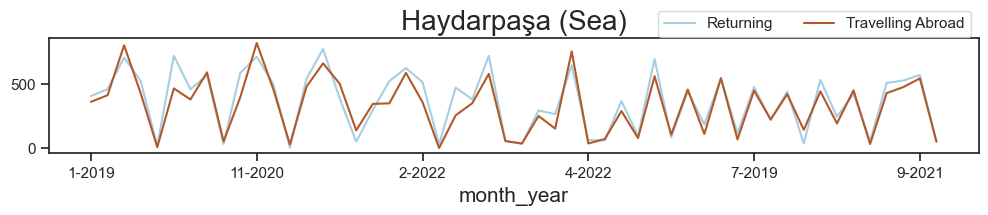

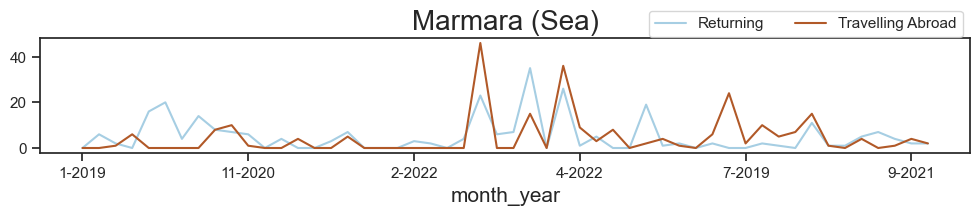

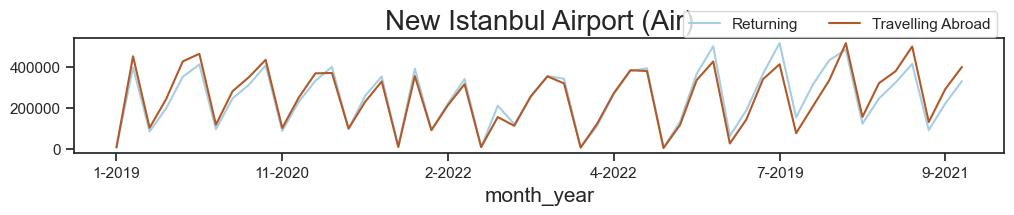

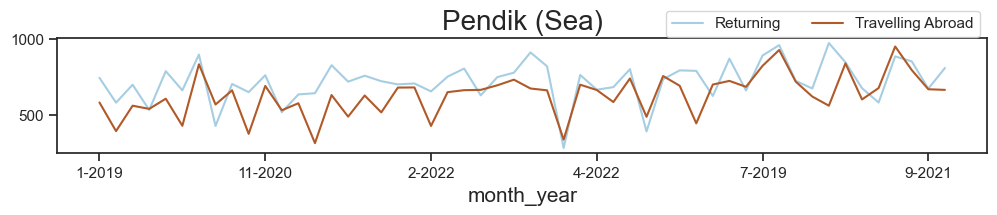

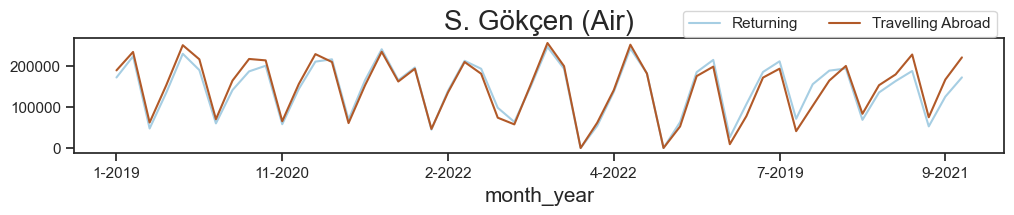

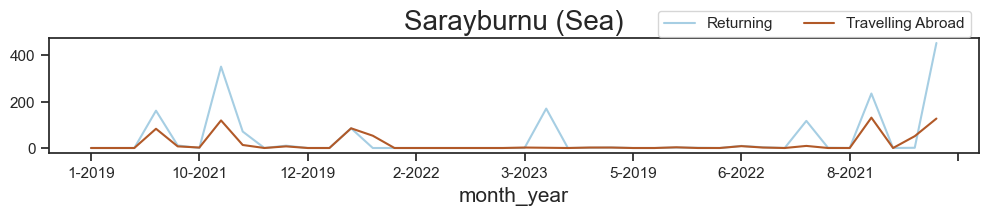

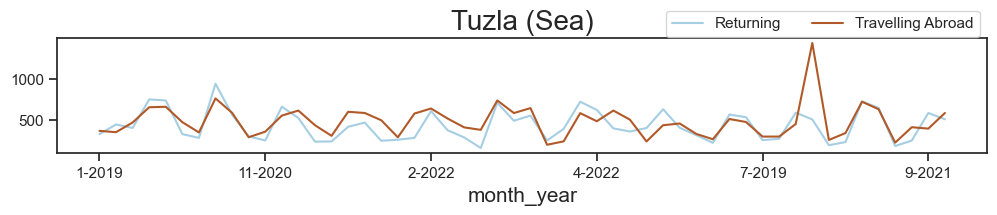

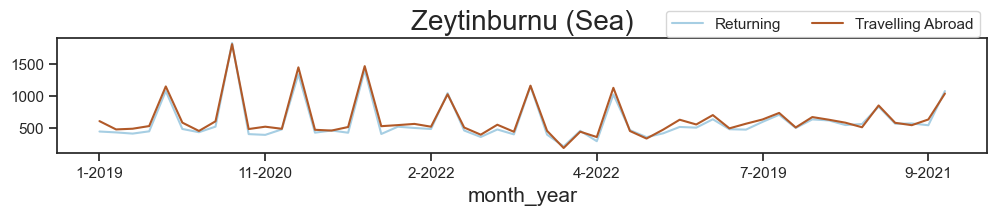

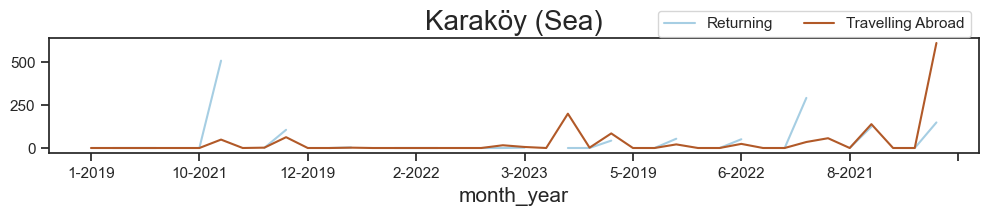

In [51]:
for gate in ctzn_df["BORDER GATES"].unique():

    (
        ctzn_df.query(f"`BORDER GATES`=='{gate}'")
        .groupby(["month_year", "citizen_travel_type"])['number_of_people'].sum()
        .unstack("citizen_travel_type")
        .plot(figsize=(12, 1.5), cmap="Paired")
    );

    plt.legend(ncol=2, loc="upper right", bbox_to_anchor=(1, 1.3))
    plt.title(gate)
    plt.show();

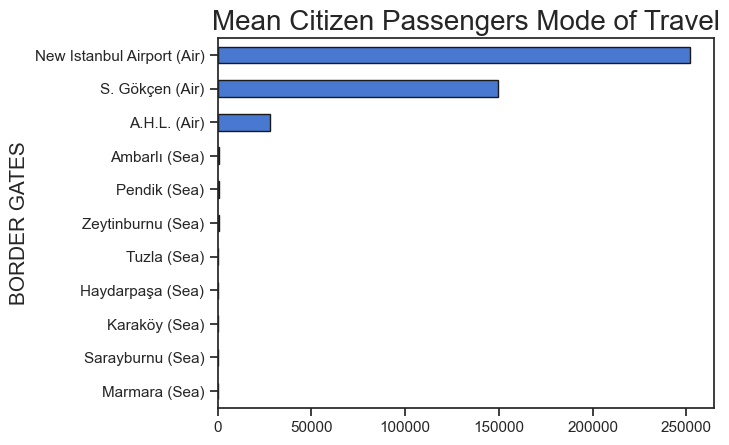

In [56]:
(
    ctzn_df.groupby("BORDER GATES")['number_of_people'].mean()
    .sort_values()
    .plot(kind='barh', edgecolor='k', title="Mean Citizen Passengers Mode of Travel")
);

#### Most of the citizens travel to and from Istanbul using Air travel compared to Sea Travel.

In [59]:
# ctzn_df.drop("month_year", axis=1).to_csv("datasets/tr_tourist_citizen_monthlytravel/citizen_travel_df.csv", index=False)

# Tourist Data

In [61]:
tour_df["month_year"] = tour_df["month"].astype("string") + "-" + tour_df["year"].astype("string")

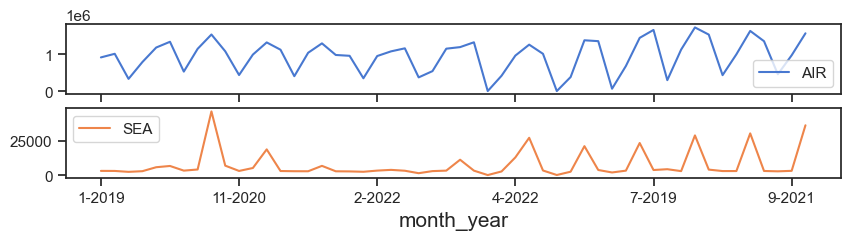

In [73]:
(
    tour_df.groupby("month_year")[["AIR", "SEA"]].sum()
    .plot(subplots=True, figsize=(10, 2))
);

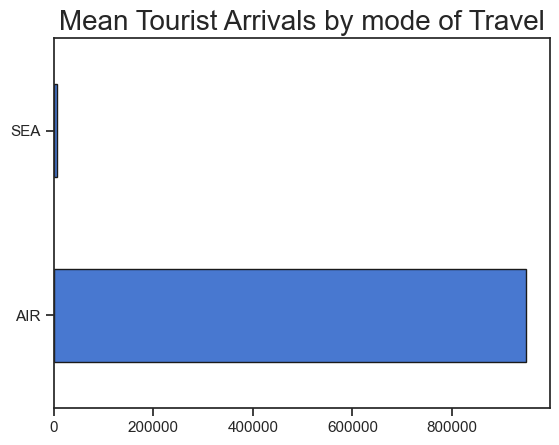

In [78]:
tour_df[["AIR", "SEA"]].mean().\
    plot(kind="barh", edgecolor="k", title="Mean Tourist Arrivals by mode of Travel");

In [72]:
# tour_df.drop(["PROVINCES", "PERCENTAGE (%)", "month_year"], axis=1).\
#     to_csv("datasets/tr_tourist_citizen_monthlytravel/tourist_monthly_arrivals.csv", index=False)